<a href="https://colab.research.google.com/github/KrzysztofTyszecki/data-science-bootcamp/blob/main/Drzewo_Decyzyjne_i_Suport_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Drzewo decyzyjne:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image

sns.set()
np.random.seed(10)

In [2]:
iris = load_iris()
data = iris.data
targets = iris.target
feature_names = [name.replace(' ', '_')[:-5] for name in iris.feature_names]
class_names = iris.target_names

print(f'Liczba próbek: {len(data)}')
print(f'Kształt danych: {data.shape}')
print(f'Nazwy zmiennych objaśniających: {feature_names}')
print(f'Nazwy kategorii kosaćca: {class_names}')

Liczba próbek: 150
Kształt danych: (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kategorii kosaćca: ['setosa' 'versicolor' 'virginica']


In [3]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_setosa.jpg', width=200)

In [5]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_versicolor.jpg', width=200)

In [6]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_virginica.jpg', width=200)

In [7]:
data_targets = np.c_[data, targets]
df = pd.DataFrame(data_targets, columns=feature_names + ['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


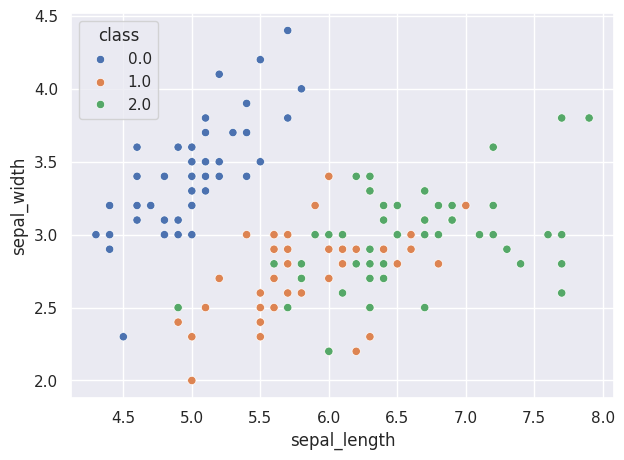

In [10]:
plt.figure(figsize=(7, 5))
_ = sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=df, legend='full', palette=sns.color_palette()[:3])

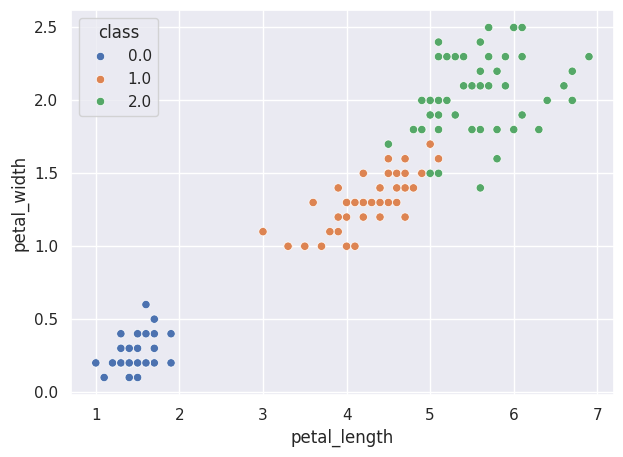

In [12]:
plt.figure(figsize=(7, 5))
_ = sns.scatterplot(x='petal_length', y='petal_width', hue='class', data=df, legend='full', palette=sns.color_palette()[:3])

In [13]:
df['class'].value_counts()

,count
class,
0.0,50
1.0,50
2.0,50


In [14]:
X = df.copy()
X = X[['petal_length', 'petal_width', 'class']]
y = X.pop('class')
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [15]:
X = X.values
y = y.values.astype('int16')

In [16]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1, random_state=30)
classifier.fit(X, y)

DecisionTreeClassifier(max_depth=1, random_state=30)

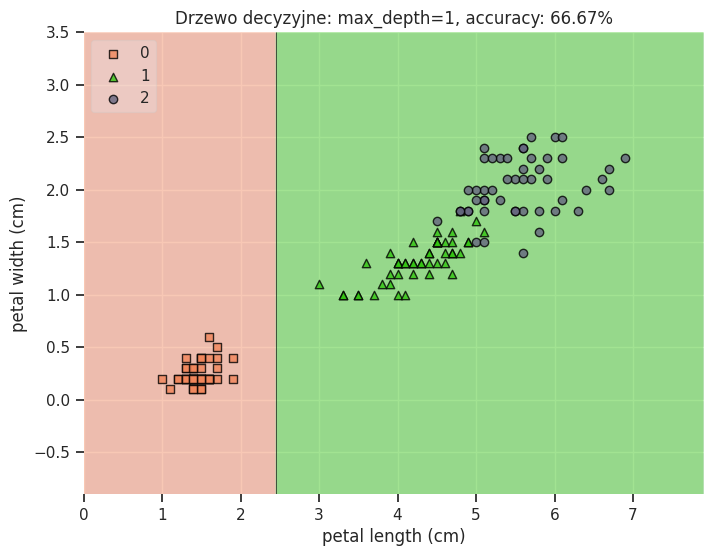

In [17]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

acc = classifier.score(X, y)

plt.figure(figsize=(8, 6))
plot_decision_regions(X, y, classifier, legend=2, colors=colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc * 100:.2f}%')
plt.show()

In [18]:
from sklearn.tree import export_graphviz

export_graphviz(classifier,
               out_file='iris_tree.dot',
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True)

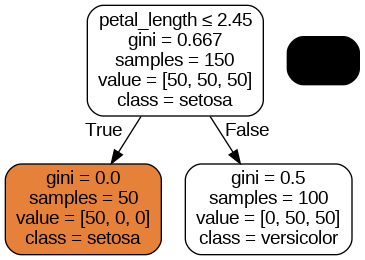

In [20]:
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(classifier,
               out_file=dot_data,
               feature_names=feature_names[2:],
               class_names=class_names,
               special_characters=True,
               rounded=True,
               filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png(), width=250)

In [21]:
def make_decision_tree(max_depth=1):
    # trenowanie modelu
    classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=30)
    classifier.fit(X, y)

    # eksport grafu drzewa
    dot_data = StringIO()
    export_graphviz(classifier,
                   out_file=dot_data,
                   feature_names=feature_names[2:],
                   class_names=class_names,
                   special_characters=True,
                   rounded=True,
                   filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')

    # obliczenie dokładności
    acc = classifier.score(X, y)

    # wykreślenie granic decyzyjnych
    colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
    plt.figure(figsize=(8, 6))
    ax = plot_decision_regions(X, y, classifier, legend=0, colors=colors)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['setosa', 'versicolor', 'virginica'], framealpha=0.3)
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    plt.title(f'Drzewo decyzyjne: max_depth={max_depth}, accuracy={acc * 100:.2f}')

    return Image(graph.create_png(), width=150 + max_depth * 80)

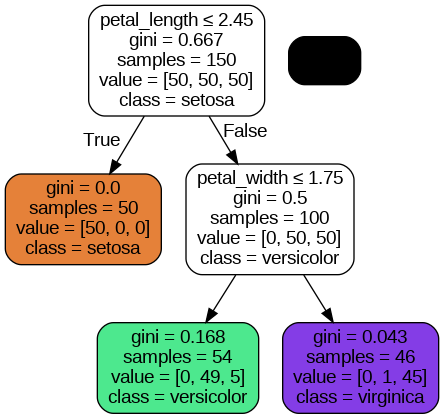

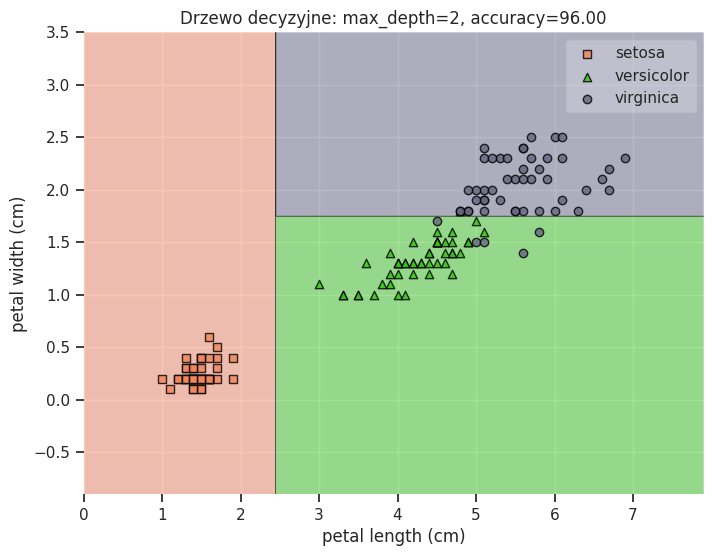

In [22]:
make_decision_tree(max_depth=2)

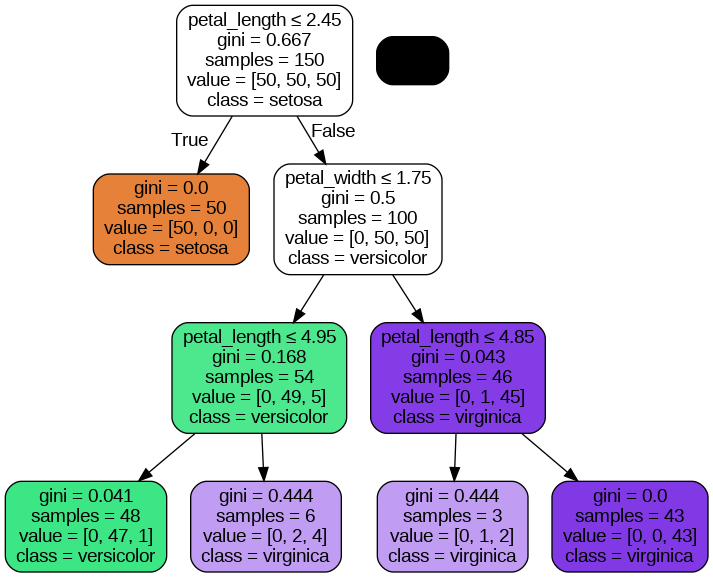

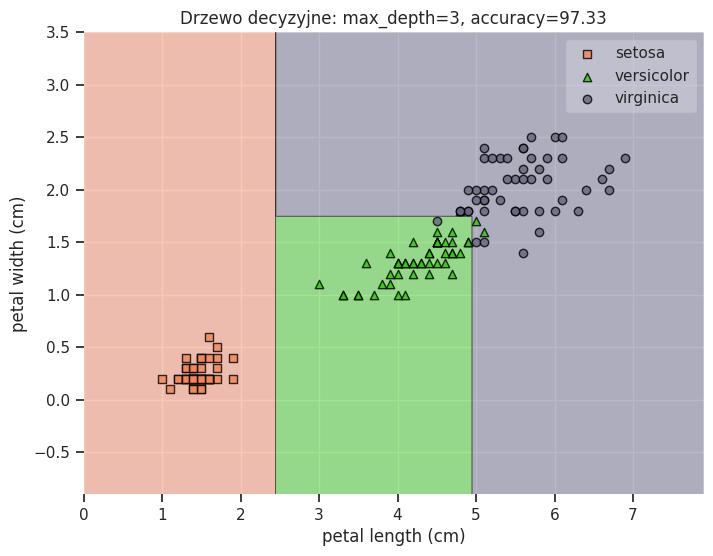

In [23]:
make_decision_tree(max_depth=3)

**Support Vector Machine**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
sns.set()

In [2]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
images = digits.images
labels = digits.target
print('images.shape:', images.shape)
print('labels.shape:', labels.shape)

images.shape: (1797, 8, 8)
labels.shape: (1797,)


In [7]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

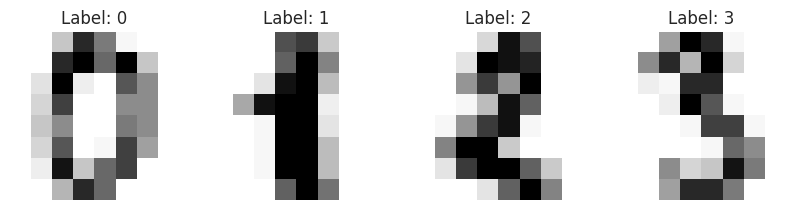

In [8]:
plt.figure(figsize=(10, 10))
for index, (image, label) in enumerate(list(zip(images, labels))[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title('Label: {}'.format(index, label))

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print()
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (1347, 8, 8)
x_test shape: (450, 8, 8)
y_train shape: (1347,)
y_test shape: (450,)

x_train shape: (1347, 64)
x_test shape: (450, 64)


In [13]:
from sklearn.svm import SVC
classifier = SVC(gamma=0.001)
classifier.fit(x_train, y_train)

SVC(gamma=0.001)

In [14]:
y_pred = classifier.predict(x_test)
y_pred

array([7, 9, 5, 0, 9, 7, 2, 8, 4, 3, 2, 4, 8, 7, 7, 1, 6, 8, 0, 6, 5, 6,
       8, 0, 1, 8, 6, 8, 3, 9, 9, 6, 0, 1, 9, 3, 3, 2, 8, 0, 9, 6, 5, 8,
       0, 6, 7, 7, 6, 7, 5, 7, 4, 3, 8, 9, 8, 3, 2, 8, 3, 7, 2, 7, 0, 8,
       4, 0, 6, 8, 9, 1, 2, 1, 3, 9, 4, 8, 3, 4, 6, 3, 0, 4, 8, 5, 1, 8,
       1, 0, 3, 1, 8, 7, 5, 3, 7, 7, 7, 0, 3, 4, 1, 9, 7, 4, 2, 6, 6, 7,
       7, 5, 0, 1, 5, 4, 0, 8, 5, 7, 3, 8, 6, 9, 2, 3, 7, 9, 3, 0, 9, 9,
       2, 6, 6, 4, 2, 0, 2, 1, 3, 2, 0, 8, 3, 1, 0, 7, 6, 3, 3, 7, 5, 8,
       1, 2, 2, 4, 2, 0, 5, 5, 4, 9, 9, 3, 0, 6, 3, 2, 3, 1, 8, 9, 9, 0,
       4, 4, 1, 5, 9, 9, 9, 8, 5, 8, 3, 1, 9, 6, 5, 7, 9, 5, 3, 0, 8, 6,
       5, 6, 7, 5, 9, 4, 2, 9, 0, 9, 0, 4, 2, 0, 6, 0, 8, 9, 9, 7, 1, 1,
       3, 5, 1, 4, 5, 2, 1, 2, 8, 0, 7, 6, 6, 8, 6, 7, 7, 1, 1, 7, 9, 9,
       1, 8, 8, 5, 7, 1, 3, 5, 6, 1, 6, 6, 2, 4, 5, 7, 6, 6, 1, 0, 3, 2,
       8, 1, 2, 0, 1, 6, 3, 2, 9, 5, 2, 2, 3, 8, 5, 1, 6, 8, 8, 4, 1, 9,
       6, 1, 3, 7, 8, 9, 3, 4, 3, 0, 5, 1, 1, 6, 4,

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        45
           4       1.00      1.00      1.00        39
           5       1.00      0.98      0.99        46
           6       1.00      0.98      0.99        45
           7       1.00      1.00      1.00        46
           8       0.98      1.00      0.99        53
           9       0.98      1.00      0.99        47

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



In [16]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 46,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 53,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 47]])

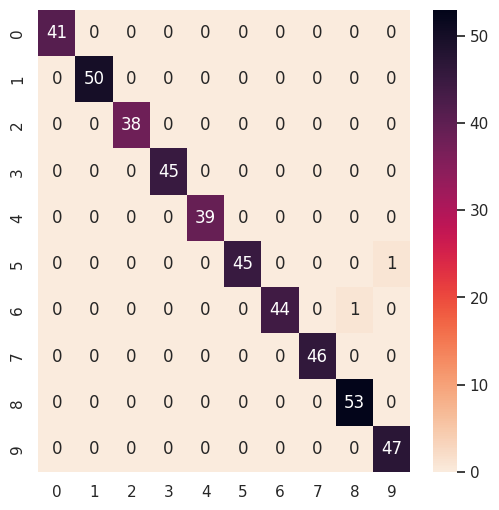

In [19]:
_ = sns.heatmap(cm, annot=True, cmap=sns.cm.rocket_r)

In [20]:
results = pd.DataFrame(data={'y_test': y_test, 'y_pred': y_pred})
results.head()

,y_test,y_pred
0,7,7
1,9,9
2,5,5
3,0,0
4,9,9


In [23]:
errors = results[results['y_pred'] != results['y_test']]
errors_idxs = list(errors.index)
errors_idxs

[310, 324]

In [24]:
results.loc[errors_idxs,:]

,y_test,y_pred
310,5,9
324,6,8


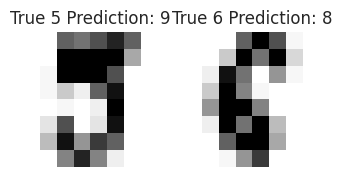

In [25]:
plt.figure(figsize=(8, 8))
for idx, error_idx in enumerate(errors_idxs[:4]):
    image = x_test[error_idx].reshape(8, 8)
    plt.subplot(2, 4, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title(f"True {results.loc[error_idx, 'y_test']} Prediction: {results.loc[error_idx, 'y_pred']}")